# Generate the signals for lab

This notebook generates and stores the input and output signals for lab 6 according to the formulas in the lab notebook.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# parameters to be estimated
g = 4    # m/s^2
c = 50   # m/s

v0 = 20 # m/s

In [27]:
# transmitted signal: sinusoid of frequency f_0
fs = 22050

f0 = 1000
A = 1
phi = 0

# length of round trip
dur = 2*v0 / g

tt = np.arange(0, dur, 1/fs)
ss = A*np.cos(2*np.pi * f0 * tt + phi)

In [28]:
# received signal
d = v0 * tt - 0.5 * g * tt**2
tau = d/c
psi = 2*np.pi * f0 * tt - 2*np.pi * f0 * tau

# slowly varying amplitude
AA = 1/np.sqrt(1 + d)

rr = AA * np.cos(psi)

In [29]:
# load Audio widget
from IPython.display import Audio

In [30]:
Audio(rr, rate=fs)

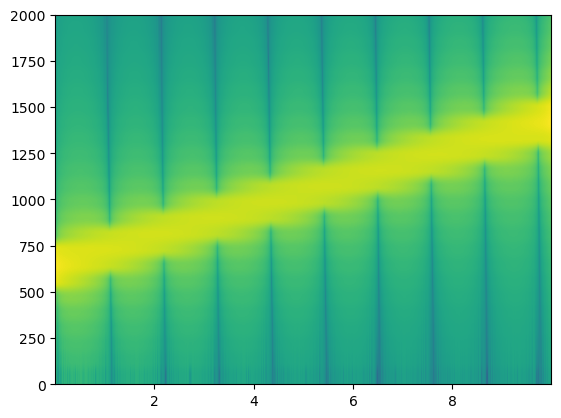

In [32]:
plt.specgram(rr, Fs=fs)
plt.ylim(0, 2000)

plt.show()

In [33]:
Audio(ss, rate=fs)

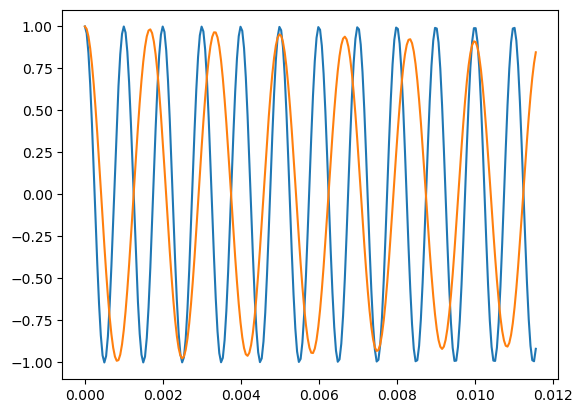

In [36]:
plt.plot(tt[:256], ss[:256])
plt.plot(tt[:256], rr[:256])

In [37]:
# save to file
outfile = 'data.npz'

np.savez(outfile, ss=ss, rr=rr, fs=fs, f0=f0, v0=v0)